<a href="https://colab.research.google.com/github/nanarv/aibuildersdeploy-nana/blob/main/%E0%B9%8CNana_AI_Builder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installation

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!python --version

Python 3.10.12


In [ ]:
!pip install torch==1.13.1+cu117 torchvision==0.14.1+cu117 torchaudio==0.13.1 --extra-index-url https://download.pytorch.org/whl/cu117
!pip install fastai==1.0.61

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/cu117
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 GB 741.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.3/24.3 MB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 79.9 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.0.1+cu118
    Uninstalling torch-2.0.1+cu118:
      Successfully uninstalled torch-2.0.1+cu118
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.15.2+cu118
    Uninstalling torchvision-0.15.2+cu118:
      Successfully uninstalled torchvision-0.15.2+cu118
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 2.0.2+cu118
    Uninstalling torchaudio-2.0.2+cu118:
      Successfully uninstalled torchaudio-2.0.2+cu118
ERROR: pip's dependency resolver does not currently take into account all th

loading train set and labels by google drive file id

In [ ]:
!gdown 1IzbRzUitiUuVpj0duACzN_cMk-1qCTCb

Downloading...
From: https://drive.google.com/uc?id=1IzbRzUitiUuVpj0duACzN_cMk-1qCTCb
To: /content/train.zip
100% 2.87G/2.87G [00:34<00:00, 84.2MB/s]


In [ ]:
!gdown 1VYQt0CW1nX_egJxvu0rM35GfUMqX9jtT

Downloading...
From: https://drive.google.com/uc?id=1VYQt0CW1nX_egJxvu0rM35GfUMqX9jtT
To: /content/trainLabels.csv
100% 465k/465k [00:00<00:00, 182MB/s]


In [ ]:
!unzip train.zip

Archive:  train.zip
   creating: train/
  inflating: train/8421_right.jpeg   
  inflating: train/8424_left.jpeg    
  inflating: train/8424_right.jpeg   
  inflating: train/8425_left.jpeg    
  inflating: train/8425_right.jpeg   
  inflating: train/8426_left.jpeg    
  inflating: train/8426_right.jpeg   
  inflating: train/842_left.jpeg     
  inflating: train/842_right.jpeg    
  inflating: train/8430_left.jpeg    
  inflating: train/8430_right.jpeg   
  inflating: train/8433_left.jpeg    
  inflating: train/8433_right.jpeg   
  inflating: train/8434_left.jpeg    
  inflating: train/8434_right.jpeg   
  inflating: train/8439_left.jpeg    
  inflating: train/8439_right.jpeg   
  inflating: train/8447_left.jpeg    
  inflating: train/8447_right.jpeg   
  inflating: train/8449_left.jpeg    
  inflating: train/8449_right.jpeg   
  inflating: train/844_left.jpeg     
  inflating: train/844_right.jpeg    
  inflating: train/8451_left.jpeg    
  inflating: train/8451_right.jpeg   
  inflatin

In [ ]:
!cp trainLabels.csv ./train

In [ ]:
!sudo update-alternatives --config python3

There are 2 choices for the alternative python3 (providing /usr/bin/python3).

  Selection    Path                 Priority   Status
------------------------------------------------------------
* 0            /usr/bin/python3.10   2         auto mode
  1            /usr/bin/python3.10   2         manual mode
  2            /usr/bin/python3.8    1         manual mode

Press <enter> to keep the current choice[*], or type selection number: 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pandas.core.internals.blocks import IgnoreRaise
import os
import torch
from torch import Tensor
from fastai import *
from fastai.vision import *
from torchvision import transforms
import collections
import collections.abc
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
files = os.listdir(r'train')
print('trainLabels.csv' in files) #Is the labels csv in the directory?
print(len(files)) #There should be 1427 images + 1 csv file = 1428 files

True
1428


In [ ]:
print('Make sure cuda is installed:', torch.cuda.is_available())
print('Make sure cudnn is enabled:', torch.backends.cudnn.enabled)

Make sure cuda is installed: True
Make sure cudnn is enabled: True


In [ ]:
base_image_dir = os.path.join('../content', 'train')
#print(base_image_dir)
#sample image path: /content/train/9584_left.jpeg
df = pd.read_csv(os.path.join(base_image_dir, r'/content/trainLabels.csv'))
df['path'] = df['image'].map(lambda x: os.path.join(base_image_dir,'{}.jpeg'.format(x)))
df['exists'] = df['path'].map(os.path.exists) #Most of the files do not exist because this is only a portion of the original dataset

In [ ]:
# test to see if the curation function works in filtering only the existing images:
def curationtest():
  sum = 0
  for x in (df['exists']):
    if x == False:
      pass
    else:
      sum+=1
  if sum == len(files)-1:
    return("success")
  else:
    return("fail")
# call test
curationtest()

'success'

In [ ]:
df = df[df['exists']]
df = df.drop(columns=['image','exists'])
df = df.sample(frac=1).reset_index(drop=True) #shuffle dataframe
df.head(10)

,level,path
0,0,../content/train/8790_right.jpeg
1,0,../content/train/9553_right.jpeg
2,0,../content/train/9768_left.jpeg
3,4,../content/train/9680_left.jpeg
4,0,../content/train/8695_right.jpeg
5,0,../content/train/8614_left.jpeg
6,0,../content/train/8593_right.jpeg
7,0,../content/train/8482_right.jpeg
8,0,../content/train/9906_left.jpeg
9,1,../content/train/9255_right.jpeg


In [ ]:
!pip install python-core

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 78.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.1/278.1 kB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 90.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5

<Axes: >

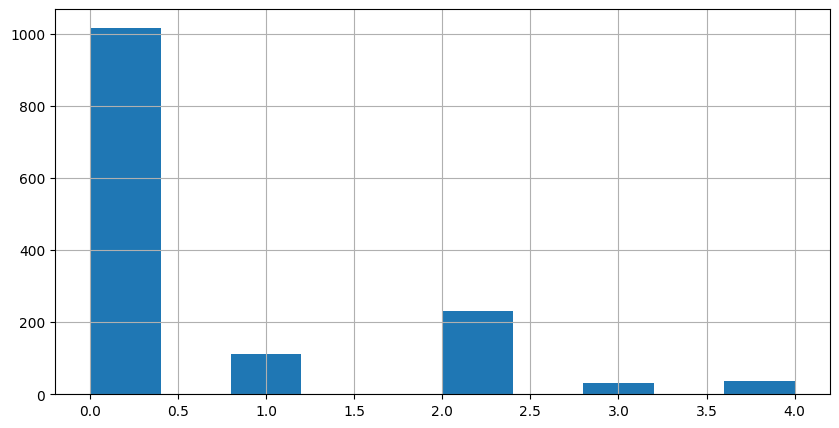

In [ ]:
df['level'].hist(figsize = (10, 5)) # shows highly unbalanced data with 0 outweighing the rest

In [ ]:
df.pivot_table(index='level', aggfunc=len)

,path
level,
0,1017
1,112
2,230
3,32
4,36


In [ ]:
import collections
from torchvision import transforms

# function to repeat the less frequent images to make dataset more balanced
def balance_data(class_size,df):
    train_df = df.groupby(['level']).apply(lambda x: x.sample(class_size, replace = True)).reset_index(drop = True)
    train_df = train_df.sample(frac=1).reset_index(drop=True)
    print('New Data Size:', train_df.shape[0], 'Old Size:', df.shape[0])
    train_df['level'].hist(figsize = (10, 5))
    return train_df

286


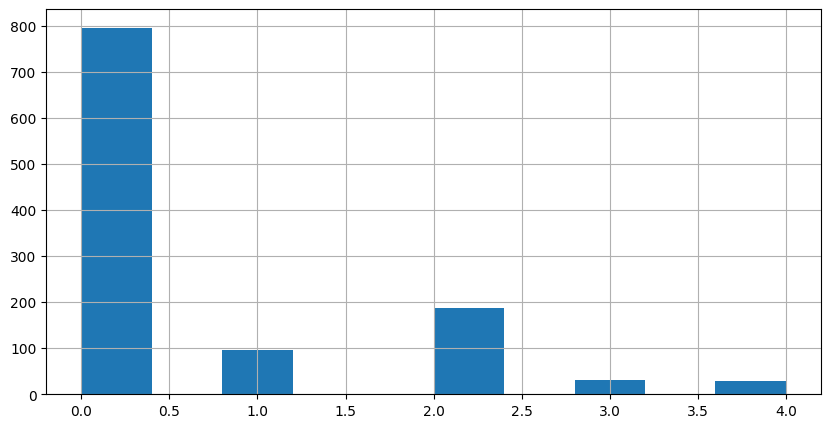

In [ ]:
train_df, val_df = train_test_split(df,test_size=0.2) # 80%/20% split of the dataset, with stratification to keep similar distribution in validation set

train_df['level'].hist(figsize = (10, 5))
print(len(val_df))


In [ ]:
len(val_df) # validation is used to fine-tune hyperparameters while test is for the final model

286

New Data Size: 3985 Old Size: 1141


<Axes: >

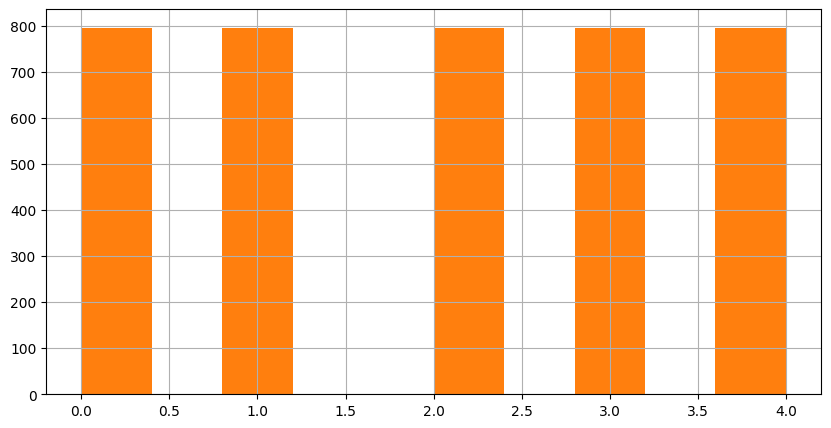

In [ ]:
train_df.pivot_table(index='level', aggfunc=len)

train_df = balance_data(train_df.pivot_table(index='level', aggfunc=len).max().max(),train_df) # I will oversample such that all classes have the same number of images as the maximum
train_df['level'].hist(figsize = (10, 5))

In [ ]:
df = pd.concat([train_df,val_df]) #beginning of this dataframe is the oversampled training set, end is the validation set
print(len(df))

4271


In [ ]:
im = Image.open(train_df['path'][1])
width, height = im.size
print( width,"x",height)

3504 x 2336


In [ ]:
bs = 20 #smaller batch size is better for training, but may take longer
sz=224

In [ ]:
tfms = get_transforms(do_flip=True,flip_vert=True,max_rotate=360,max_warp=0,max_zoom=1.1,max_lighting=0.1,p_lighting=0.5)
src = (ImageList.from_df(df=df,path='./',cols='path') #get dataset from dataset
        .split_by_idx(range(len(train_df)-1,len(df))) #Splitting the dataset
        .label_from_df(cols='level') #obtain labels from the level column
      )
data= (src.transform(tfms,size=sz) #Data augmentation
        .databunch(bs=bs,num_workers=0) #DataBunch
        .normalize(imagenet_stats) #Normalize
       )

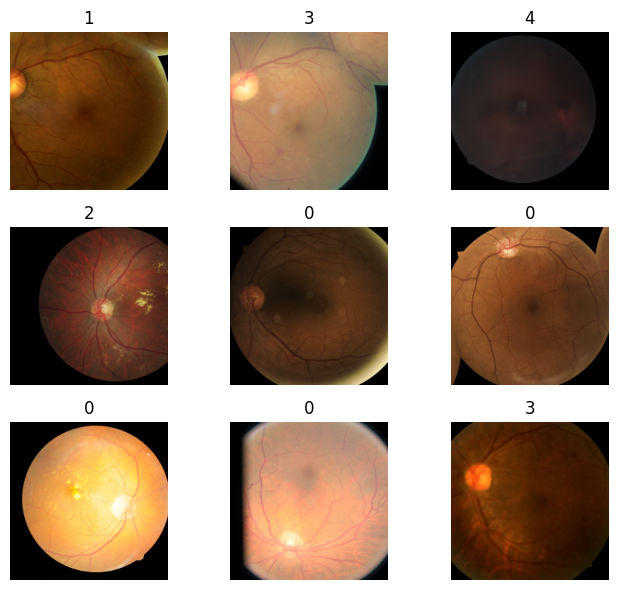

In [ ]:
data.show_batch(rows=3, figsize=(7,6))

In [ ]:
print(data.classes) # level of diabetic retinopathy
len(data.classes),data.c

[0, 1, 2, 3, 4]


(5, 5)

In [ ]:
from sklearn.metrics import cohen_kappa_score
def quadratic_kappa(y_hat, y):
    return torch.tensor(cohen_kappa_score(torch.argmax(y_hat.cpu(),1), y.cpu(), weights='quadratic'),device='cuda:0')

In [ ]:
import torchvision

In [ ]:
learn = create_cnn(data, models.resnet50, metrics = [accuracy,quadratic_kappa])

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,quadratic_kappa,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


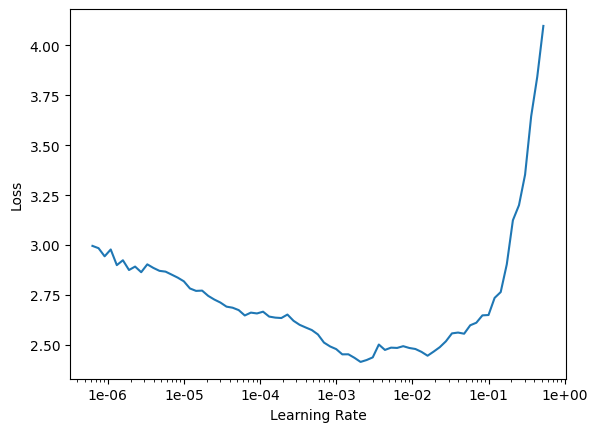

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(4,max_lr = 2e-3)

epoch,train_loss,valid_loss,accuracy,quadratic_kappa,time
0,1.516071,1.410451,0.508711,0.345004,32:40
1,0.842008,1.232713,0.498258,0.356395,29:10
2,0.614411,1.181165,0.564460,0.409710,28:15
3,0.451664,1.045748,0.609756,0.418799,29:57


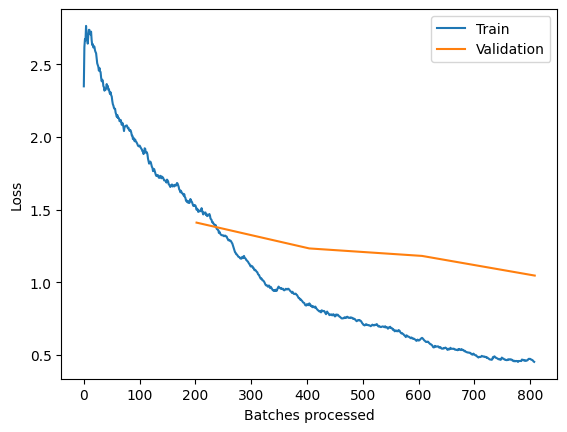

In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn.save(r'/content/drive/MyDrive/AI Builder/stage-1-224')

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,quadratic_kappa,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


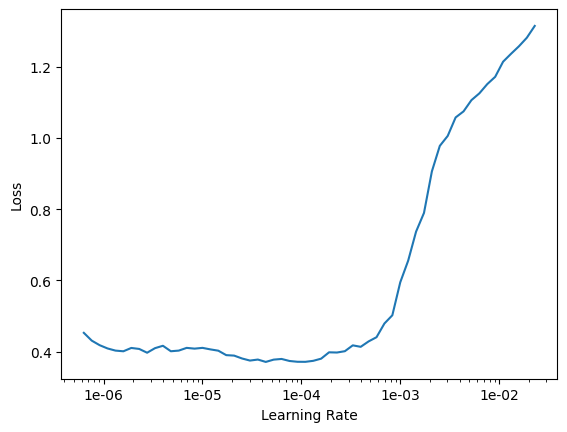

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(4, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,quadratic_kappa,time
0,0.424498,1.079913,0.599303,0.402551,30:01
1,0.362953,1.055004,0.602787,0.403376,29:31


epoch,train_loss,valid_loss,accuracy,quadratic_kappa,time
0,0.424498,1.079913,0.599303,0.402551,30:01
1,0.362953,1.055004,0.602787,0.403376,29:31
2,0.354503,1.136652,0.592335,0.380338,28:55
3,0.294224,1.110271,0.592335,0.389750,29:06


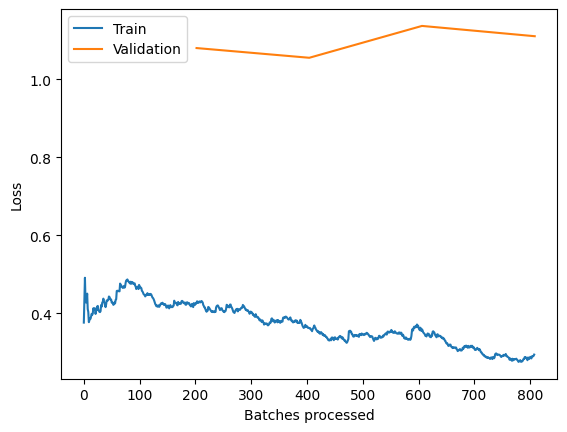

In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn.save(r'/content/drive/MyDrive/AI Builder/stage-2-224')

In [ ]:
# Progressive Resizing 448x448
data = (src.transform(tfms,size=sz*2) #Data augmentation
        .databunch(bs=bs,num_workers=0) #DataBunch
        .normalize(imagenet_stats) #Normalize
       )

In [ ]:
learn.data = data
data.train_ds[0][0].shape

torch.Size([3, 448, 448])

In [ ]:
learn.freeze()

epoch,train_loss,valid_loss,accuracy,quadratic_kappa,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


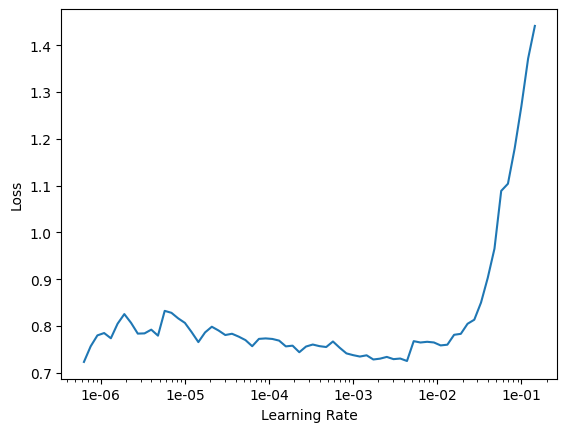

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(4,max_lr=1e-3)

epoch,train_loss,valid_loss,accuracy,quadratic_kappa,time
0,0.488334,1.018433,0.641115,0.427120,40:32
1,0.444099,1.088637,0.581882,0.362300,41:12
2,0.301964,0.977550,0.668990,0.411949,42:06


epoch,train_loss,valid_loss,accuracy,quadratic_kappa,time
0,0.488334,1.018433,0.641115,0.427120,40:32
1,0.444099,1.088637,0.581882,0.362300,41:12
2,0.301964,0.977550,0.668990,0.411949,42:06
3,0.236526,1.028230,0.644599,0.407764,42:32


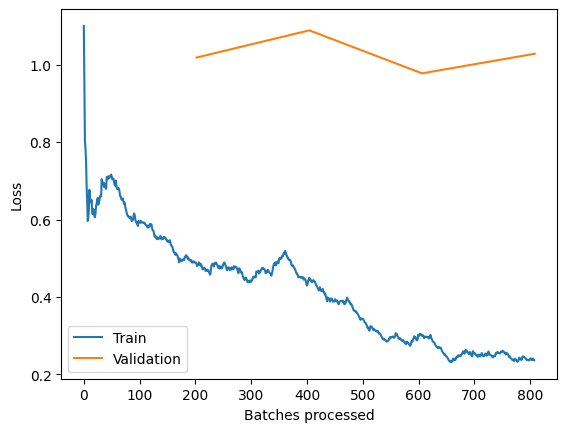

In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn.save(r'/content/drive/MyDrive/AI Builder/stage-1-448')

In [ ]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,quadratic_kappa,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


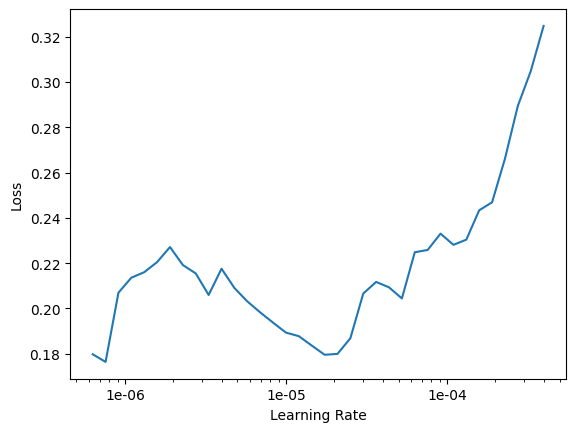

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(4,max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,quadratic_kappa,time


epoch,train_loss,valid_loss,accuracy,quadratic_kappa,time
0,0.209401,1.074803,0.641115,0.390599,41:41
1,0.208438,1.063123,0.658537,0.422869,39:57
2,0.164395,1.101378,0.641115,0.446366,40:38
3,0.149937,1.087923,0.637631,0.427793,41:40


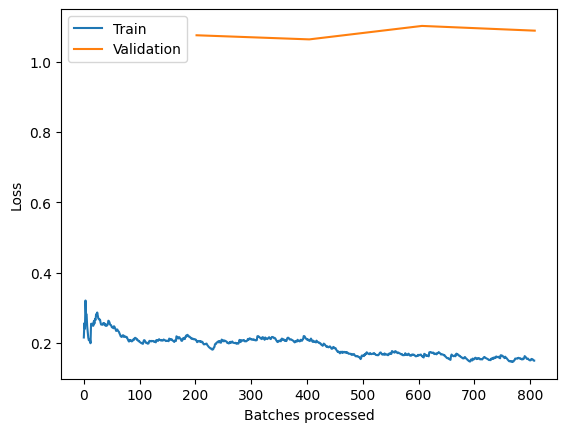

In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn.save(r'/content/drive/MyDrive/AI Builder/stage-2-448')

# Export Model


In [ ]:
learn.export(r'/content/drive/MyDrive/AI Builder/dr_ai')

An Image Available for Testing

In [ ]:
from keras.utils import load_img, img_to_array
test_image = load_img(r'/content/drive/MyDrive/AI Builder/diabetic.jpg', target_size = (448, 448))
#test_image = img_to_array(test_image)

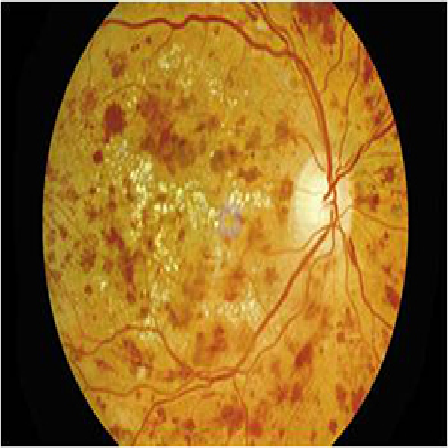

In [ ]:
test_image

# Load Weights

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics = [accuracy,quadratic_kappa])
learn.load('/content/drive/MyDrive/AI Builder/stage-1-224')

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics = [accuracy,quadratic_kappa])
learn.load('/content/drive/MyDrive/AI Builder/stage-2-224')

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics = [accuracy,quadratic_kappa])
learn.load('/content/drive/MyDrive/AI Builder/stage-1-448')

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics = [accuracy,quadratic_kappa])
learn.load('/content/drive/MyDrive/AI Builder/stage-2-448')

# Confusion Matrix

In [ ]:
from fastai.vision import *
from fastai.metrics import error_rate

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)